1000 (1000,)
[1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 0 0 0 0

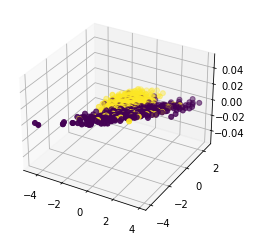

In [287]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
from scipy import stats

# Clean Data
X1,Y1 = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=0.5,flip_y=0.1,weights=[0.5,0.5], random_state=17)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25)

df = DataFrame(dict(x=X1[:,0], y=Y1))
X = df['x'].to_numpy() 
y = df['y'].to_numpy() 
print(X.shape[0], y.shape)
print(Y1)

In [288]:
# fit a liklihood probability distribution to a univariate data sample
def liklihood(x,mu,sigma):
    # fit distribution
    #print()
    pdf =((1/(sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mu)**2 / (2 * sigma**2) ))
    #print('pdf value calculated')
    #print(pdf)
    if(mu==0):
        pdf=np.nan_to_num(pdf)
    return pdf

# find the prior of a given variable
def prior(totalSamplesSize,specificClassSampleSize):
    return specificClassSampleSize/totalSamplesSize

# fit a posterior probability distribution to a univariate data sample
def posterior(x,prior,mu,sigma):
    # fit distribution
    pdf =liklihood(x,mu,sigma) * prior
    #print('pdf value calculated')
    #print(pdf)
    if(mu==0):
        pdf=np.nan_to_num(pdf)
    return pdf

def liklihoodClassifier(testdata,testoutput):
    crct=0
    for i in range(len(testdata)):
        Xsample, ysample = testdata[i], testoutput[i]
        py0 = liklihood(Xsample, mean(x0),std(x0))
        py1 = liklihood(Xsample, mean(x1),std(x1))

        if(py1>py0):
            if(ysample==1):
                crct+=1                  
        else:
            if(ysample==0):
                crct+=1
    print(crct)
    print(len(testdata))
    return crct/len(testdata)


def posteriorClassifier(testdata,testoutput,prior0,prior1):
    crct=0
    for i in range(len(testdata)):
        Xsample, ysample = testdata[i], testoutput[i]
        py0 = posterior(Xsample,prior0, mean(x0),std(x0))
        py1 = posterior(Xsample,prior1, mean(x1),std(x1))
        if(py1>py0):
            if(ysample==1):
                crct+=1                  
        else:
            if(ysample==0):
                crct+=1                    
    print(crct)
    print(len(testdata))
    return crct/len(testdata)

In [289]:
xy0 = X1[Y1==0]
xy1 = X1[Y1==1]

p0 = len(xy0)/len(X)
p1 = len(xy1)/len(X)

In [290]:
M1 = np.mean(xy0.T, axis=1)
x_m1 = xy0 - M1
V1 = np.cov(x_m1.T)
d1 =len(xy0)

M2 = np.mean(xy1.T, axis=1)
x_m2 = xy1 -M2
V2 = np.cov(x_m2.T)
d2 =len(xy1)

dist0 = stats.multivariate_normal(M1, V1)
dist1 = stats.multivariate_normal(M2, V2)

In [291]:
x0=X[y==0]
#print(x0)
x1=X[y==1]
prior0 = prior(X.shape[0],x0.shape[0])
prior1 = prior(X.shape[0],x1.shape[0])
print(x0.shape)
print(x1.shape)
print('prior of 0')
print(prior0)
print('prior of 1')
print(prior1)

(482,)
(518,)
prior of 0
0.482
prior of 1
0.518


In [292]:
pdf0 = liklihood(X,mean(x0),std(x0))
pdf1 = liklihood(X,mean(x1),std(x1))
accuracy=liklihoodClassifier(X,y)
print(accuracy)

716
1000
0.716


In [293]:
pdy0 = posterior(X,prior0, mean(x0),std(x0))
pdy1 = posterior(X,prior1, mean(x1),std(x1))
accuracy=posteriorClassifier(X,y,prior0,prior1)
print(accuracy)

721
1000
0.721


Text(0.5, 0.92, 'Liklihood')

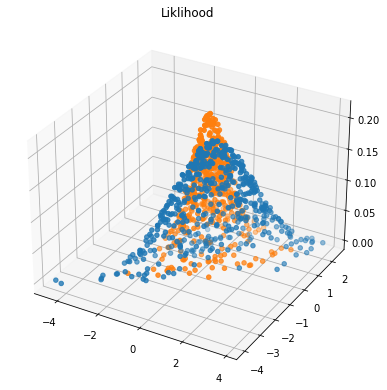

In [294]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(xy0[:,0], xy0[:,1],dist0.pdf(xy0))
ax.scatter(xy1[:,0], xy1[:,1],dist1.pdf(xy1))
plt.title('Liklihood')

Text(0.5, 0.92, 'Prosterior')

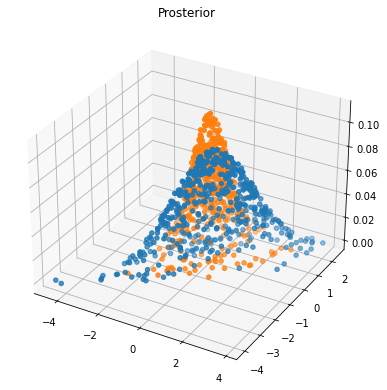

In [295]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(xy0[:,0], xy0[:,1],prior0*dist0.pdf(xy0))
ax.scatter(xy1[:,0], xy1[:,1],prior1*dist1.pdf(xy1))
plt.title('Prosterior')

In [296]:
print(prior(X.shape[0],x0.shape[0]))
print(prior(X.shape[0],x1.shape[0]))

postpdf0 = posterior(X,prior(X.shape[0],x0.shape[0]),mean(x0),std(x0))
postpdf1 = posterior(X,prior(X.shape[0],x1.shape[0]),mean(x1),std(x1))

0.482
0.518


In [297]:
print(liklihood(2,mean(x0),std(x0)))
print(liklihood(2,mean(x1),std(x1)))

0.14836285218721426
0.0017118820916334388


In [298]:
print(posterior(2,prior(X.shape[0],x0.shape[0]),mean(x0),std(x0)))
print(posterior(2,prior(X.shape[0],x1.shape[0]),mean(x1),std(x1)))

0.07151089475423728
0.0008867549234661213
